<a href="https://colab.research.google.com/github/PiyushgithubSharma/Potato_Des/blob/main/project(potato_diss).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow # install tensorflow
import tensorflow as tf # import tensorflow

In [ ]:
Image_size = 256
      # in this we createa batch of 32 pic=> means 32 pic = 1 dataset
Batch_size = 32

CHANNELS=3

EPOCHS=50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!nvidia-smi

Thu Sep 26 01:24:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
df = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle = True,
    image_size = (Image_size,Image_size),
    batch_size = Batch_size
)

Found 2166 files belonging to 5 classes.


In [ ]:
      # the name of classs dataset is you folder name

class_names = df.class_names
class_names

['Connect(api)',
 'Model(project)',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy']

In [ ]:
len(df)

68

In [ ]:
for image_batch,label_batch in df.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[3 3 3 3 2 3 2 2 2 4 2 2 3 2 3 3 2 2 3 3 2 3 3 2 3 3 4 3 2 2 3 2]


In [ ]:
# print image
for image_batch ,label_batch in df.take(1):
  print(image_batch[0])
  # for shape
  print(image_batch[0].shape)

tf.Tensor(
[[[197. 191. 195.]
  [196. 190. 194.]
  [194. 188. 192.]
  ...
  [176. 171. 178.]
  [177. 172. 179.]
  [177. 172. 179.]]

 [[195. 189. 193.]
  [195. 189. 193.]
  [194. 188. 192.]
  ...
  [172. 167. 174.]
  [173. 168. 175.]
  [173. 168. 175.]]

 [[194. 188. 192.]
  [194. 188. 192.]
  [194. 188. 192.]
  ...
  [172. 167. 174.]
  [173. 168. 175.]
  [173. 168. 175.]]

 ...

 [[127. 113. 113.]
  [146. 132. 132.]
  [136. 122. 122.]
  ...
  [128. 117. 123.]
  [135. 124. 130.]
  [120. 109. 115.]]

 [[147. 133. 133.]
  [164. 150. 150.]
  [138. 124. 124.]
  ...
  [139. 128. 134.]
  [138. 127. 133.]
  [108.  97. 103.]]

 [[130. 116. 116.]
  [133. 119. 119.]
  [133. 119. 119.]
  ...
  [129. 118. 124.]
  [ 98.  87.  93.]
  [129. 118. 124.]]], shape=(256, 256, 3), dtype=float32)
(256, 256, 3)


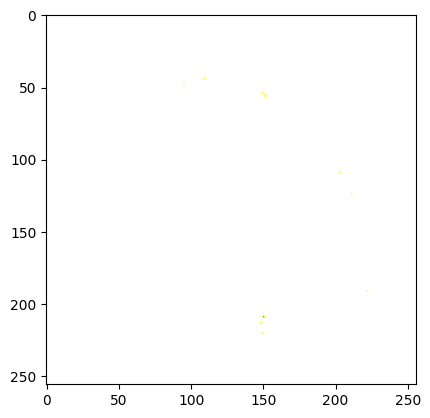

In [ ]:
# for 3-d array we use imshow
import matplotlib.pyplot as plt

for image_batch ,label_batch in df.take(1):
  plt.imshow(image_batch[0].numpy())

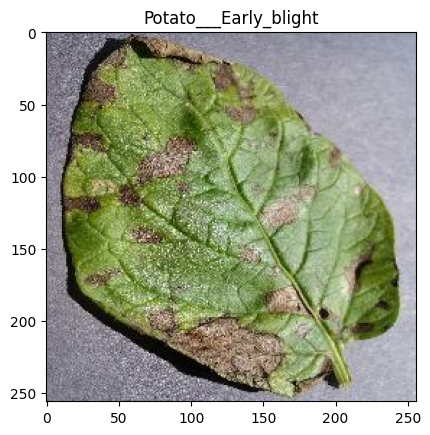

In [ ]:
    # print a pic
for image_batch, label_batch in df.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  # axis off
  plt.title(class_names[label_batch[0]])
  # plt.axis("off")

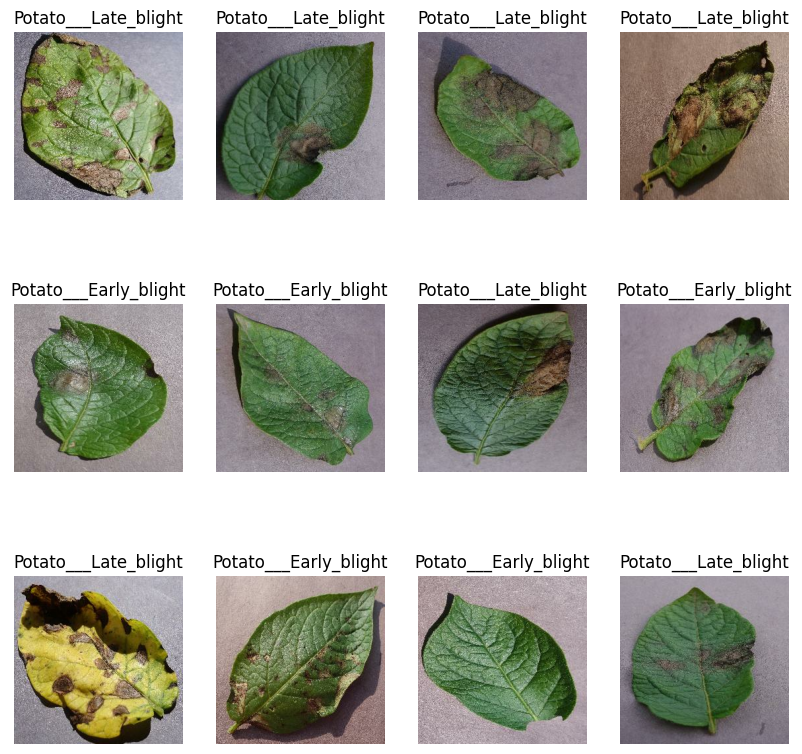

In [ ]:
# print 1 tp 12 pics

plt.figure(figsize=(10,10))
for image_batc,label_batch in df.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")


In [ ]:
len(df)

68

In [ ]:
        # now split train and test dataset
# 80% ==> training
# 20% ==> 10% validation,10% test

In [ ]:
# in ml for train test split we do sklearn but in tenserflow we can't have this so we do

train_size=0.8
len(df)*train_size
#df.take(10)


54.400000000000006

In [ ]:
    # now take these 54 sample for train dataset

    train_ds = df.take(54)
    len(train_ds)

54

In [ ]:
# for test dataset
test_ds = df.skip(54)
len(test_ds)



14

In [ ]:
val_size=0.1
len(df)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
    # validation dataset
test_ds=test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

  ds_size =len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=12)

  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds=ds.skip(train_size).skip(val_size)

  return train_ds,val_ds,test_ds

In [ ]:
      # now call function for our data set

get_dataset_partitions_tf(df)

(<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
# we use piplines in outher mathods
# cache is use to read the img from disk and for next iteration keep img in memory

#here we use prefetch for time saving so while gpu training so the cpu load the pic

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
import tensorflow as tf

resize_and_rescale=tf.keras.Sequential([
    tf.keras.layers.Resizing(Image_size, Image_size),  # Updated import path
    tf.keras.layers.Rescaling(1.0/255)  # Updated import path
])

In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.RandomRotation(0.2)
])
data_augmentation

<Sequential name=sequential_1, built=False>

In [ ]:
          # #3rd session
# buld model
import tensorflow as tf
from tensorflow.keras import layers, models # import the models object



input_shape = (Batch_size,Image_size,Image_size,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,

    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax')

])
model.build(input_shape=input_shape)



NameError: name 'data_augmentation' is not defined

In [ ]:
model.summary()

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [ ]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size = Batch_size,
    verbose=1,
    validation_data=val_ds
)


In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
history.history['accuracy']

In [ ]:
      # plot chart
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss= history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  first_image=(images_batch[0].numpy().astype('uint8'))
  first_label = labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)

  print("actual label",class_names[first_label])

  # model.prediction = model.predict(images_batch)
  # print(model.prediction[0])

  batch_prediction = model.predict(images_batch)
  print("predicted label ",class_names[np.argmax(batch_prediction[0])])

       # forimage
  #plt.imshow(images_batch[0].numpy().astype('uint8'))


In [ ]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, axis=0)  # Expand dimensions once for batching

  predictions = model.predict(img_array) # Remove extra tf.expand_dims
  prediction_class = class_names[np.argmax(predictions[0])]
  confidence = round(100*(np.max(predictions[0])),2)
  return prediction_class,confidence

In [ ]:

plt.figure(figsize=(13,13))

for images , labels in test_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    prediction_class,confidence = predict(model,images[i].numpy())
    actual_class = class_names[labels[i]]
    plt.title(f"Actual; {actual_class},\nPredicted: {prediction_class}.\n Confidance: {confidence}%")
    plt.axis('off')

In [ ]:
# save our model
# if we change in our model so we can scave diff version to change 1->2
model_version = 2
model.save(f"/content/drive/MyDrive/PlantVillage/Model(project)/{model_version}.keras") # Add .keras extension

In [ ]:
# for  check the how many versions we have
import os
[os.listdir(f"/content/drive/MyDrive/PlantVillage/Model(project)/")]